# <center>FISH MEASUREMENT PREDICTION

### Predicting(estimate) weight ,height and width of fish

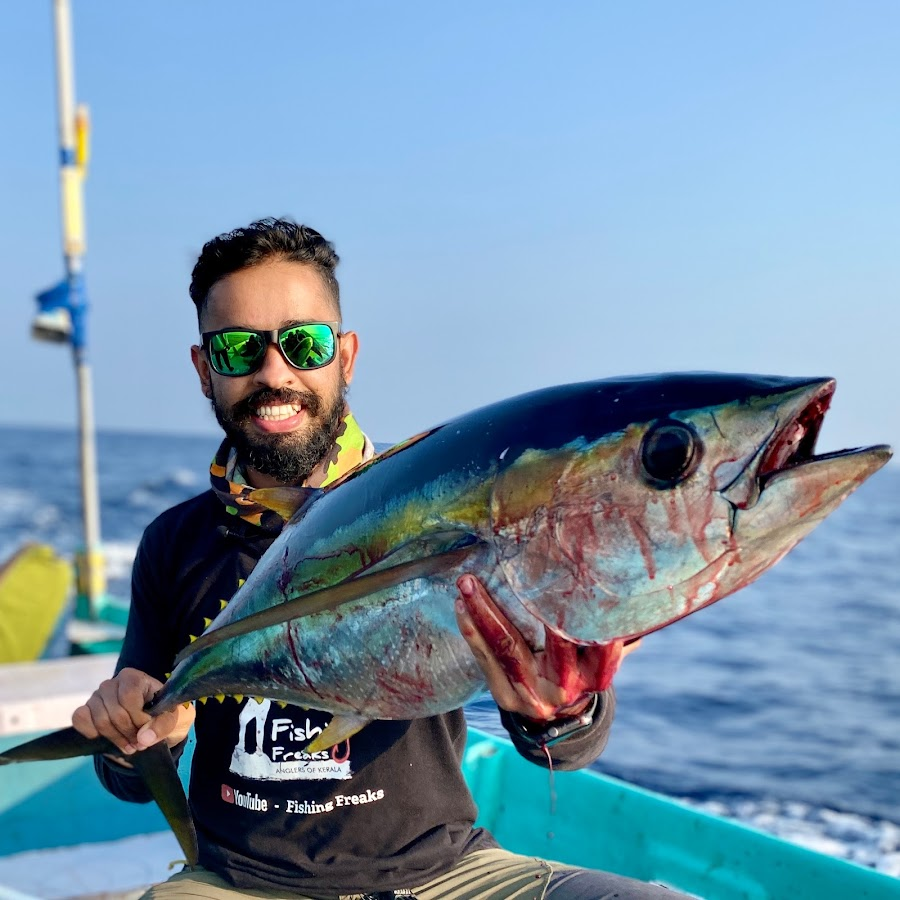

<div style="background-color:  yellow ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: bold;">ABOUT DATASET</h1>
    
</div>

#### The fish measuring prediction dataset you are referring to seems to be the "Fish Measurements" dataset, which is commonly used for regression analysis and machine learning algorithms. This dataset includes the following features:
* Species: The species of the fish (e.g., Bream, Roach, Pike, etc.).
* Weight: The weight of the fish, measured in grams.
* Length1: The length of the fish from the tip of its head to the base of its tail, measured in centimeters
* Length2: The length of the fish from the tip of its head to the end of its body, measured in centimeters
* Length3: The length of the fish from the tip of its head to the end of its tail, measured in centimeters
* Height: The height of the fish, measured in centimeters
* Width: The width of the fish, measured in centimeters
#### This dataset is often used to train models to predict the weight of a fish based on its length, height, and width. The species of the fish is also included as a feature, as different species may have different weight-to-length ratios.

### Importing libraries

In [1]:
#Basic Analysis & Visualisation libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Data Preprocessing & Splitig libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

#Machine Learning Alogorithms libararies
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR 
from sklearn.model_selection import cross_val_score

#Machine Learning Model evaluation libraries
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
#Load the dataset
data=pd.read_csv('Fish.csv')
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


<div style="background-color:  yellow ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: bold;"> DATA EXPLORATION
</h1>
    
</div>

In [3]:
#Checking dataset informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
#Checking sample size of whole data
data.sample()

,Species,Weight,Length1,Length2,Length3,Height,Width
135,Pike,510.0,40.0,42.5,45.5,6.825,4.459


In [5]:
data.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [6]:
#Checking statistical analysis of numerical values 
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
#checking for duplicated data
data.duplicated().sum()

0

In [8]:
#To drop the duplicates
data.drop_duplicates(inplace=True)

In [9]:
#Checking dataset column and row numbers
data.shape

(159, 7)

In [10]:
#Checking missing value
data.isnull().sum()*100

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

## Data Visualisation Method

### Univariate Analysis

### Box plot(Whisker Plot)

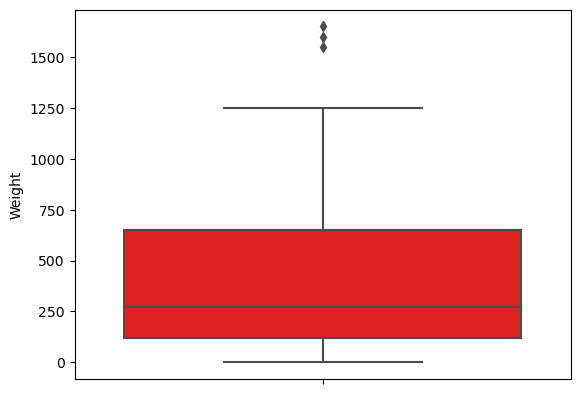

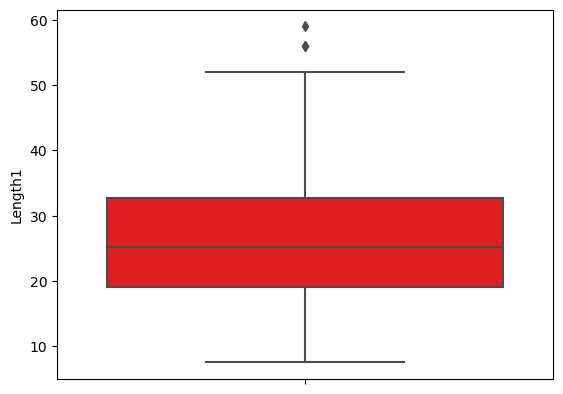

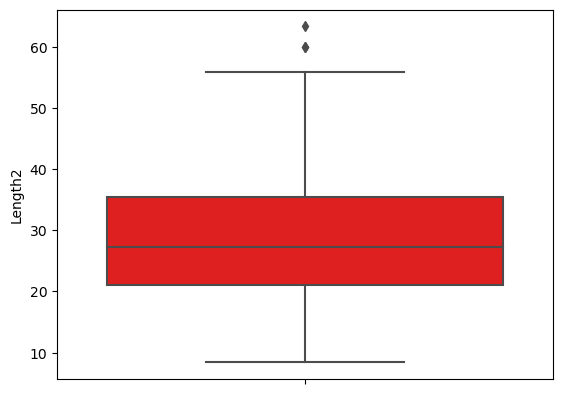

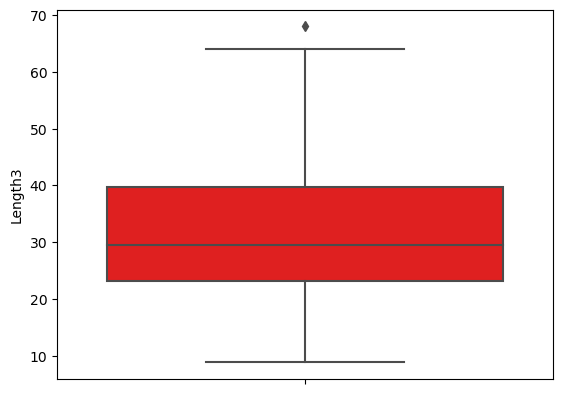

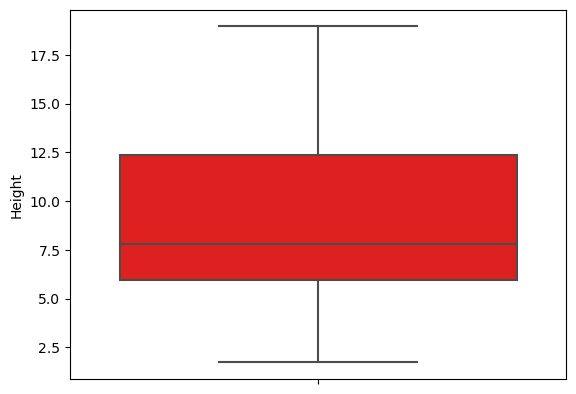

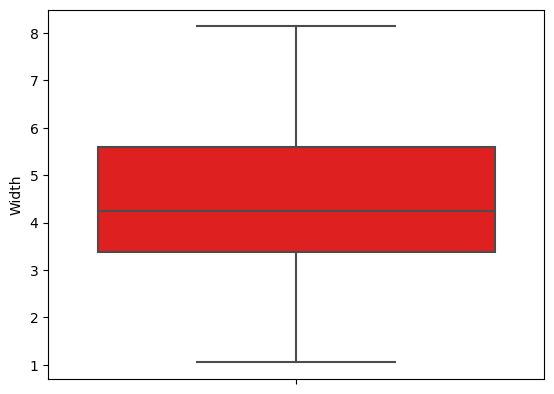

In [11]:
#Shows how the data is distributed and it also shows any outliers
for i in data.columns:
    if data[i].dtypes !='object':
        sns.boxplot(y=data[i],color="red")
        plt.show()

<div style="background-color:  yellow ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: bold;"> EXPLORATORY DATA ANALYSIS(EDA)
</h1>
    
</div>


### Hist plot

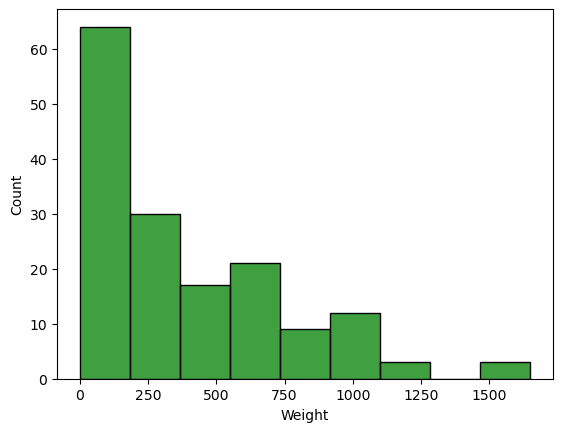

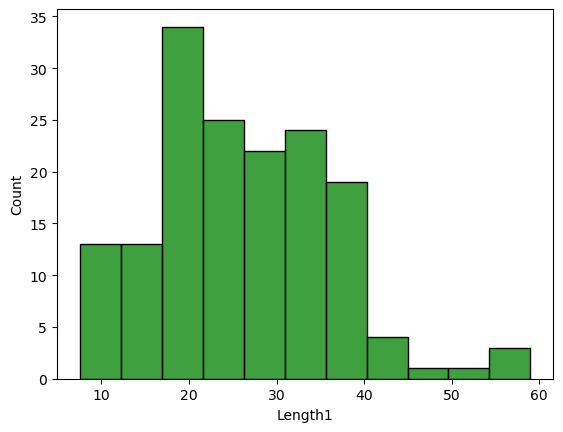

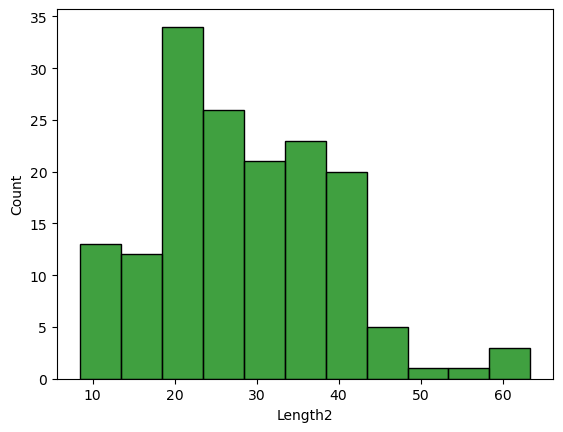

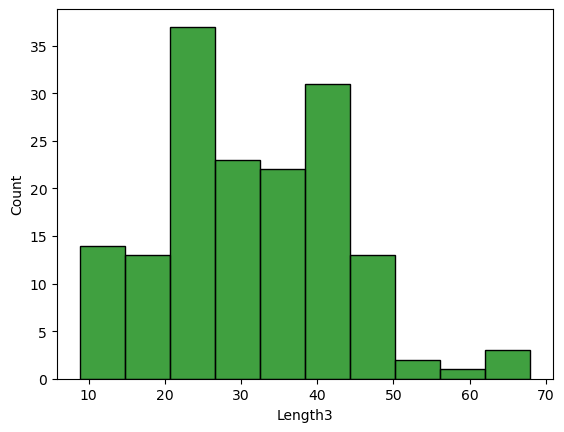

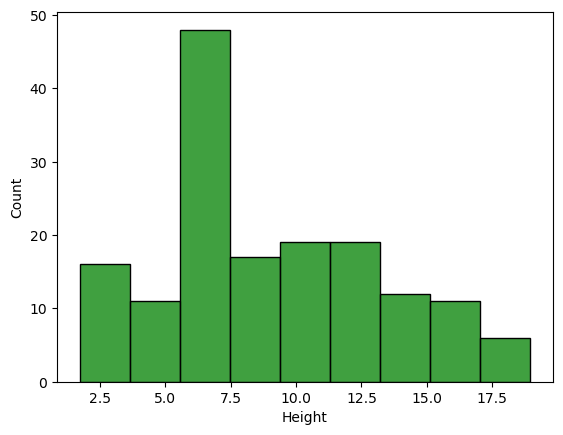

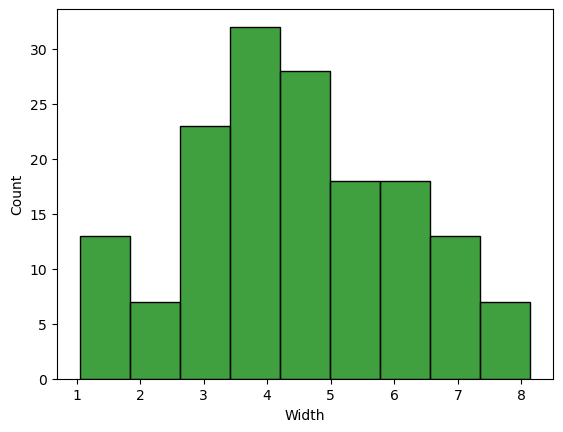

In [12]:
#To check whether it is uniform distribution (freequency) or not
for i in data.columns:
    if data[i].dtypes !='object':
        sns.histplot(x=data[i],color='g')
        plt.show();

### Kde plot (Kernal Density Estimate plot)

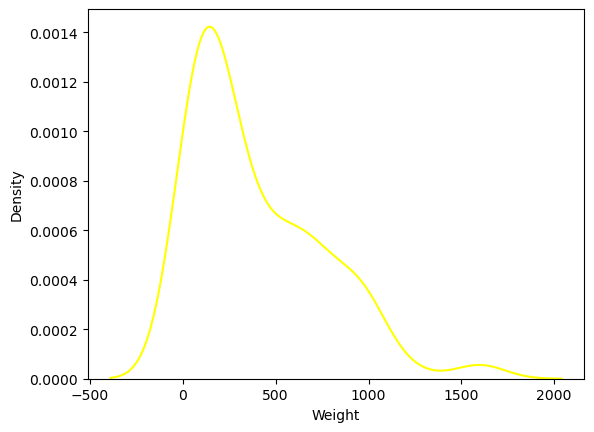

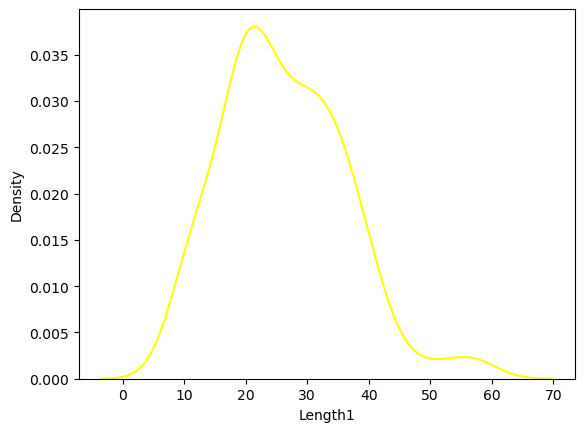

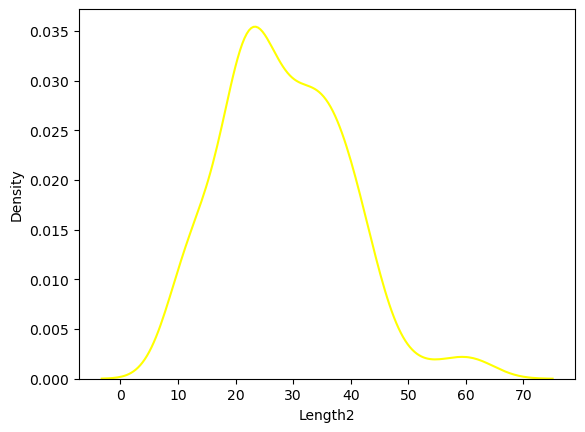

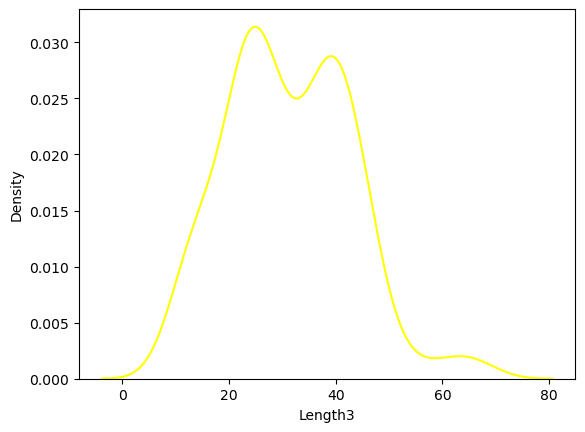

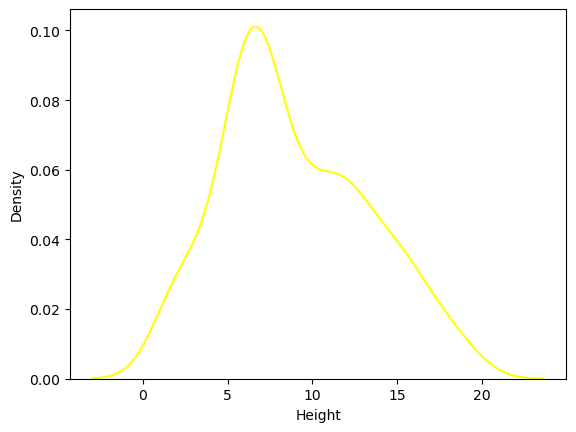

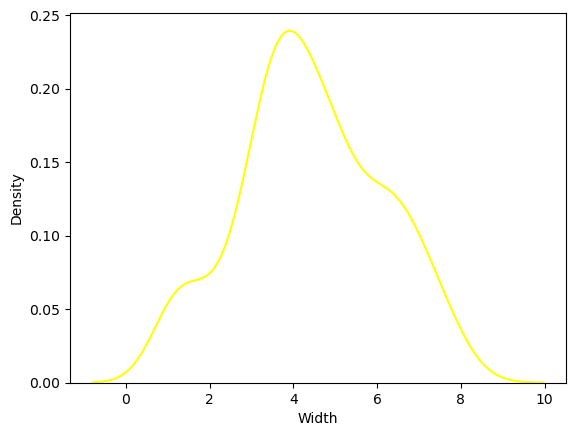

In [13]:
#To check whether it is uniform distribution (Density) or not
for i in data.columns:
    if data[i].dtypes != "object":
        sns.kdeplot(x =data[i],color="yellow" )
        plt.show()

### Dist plot

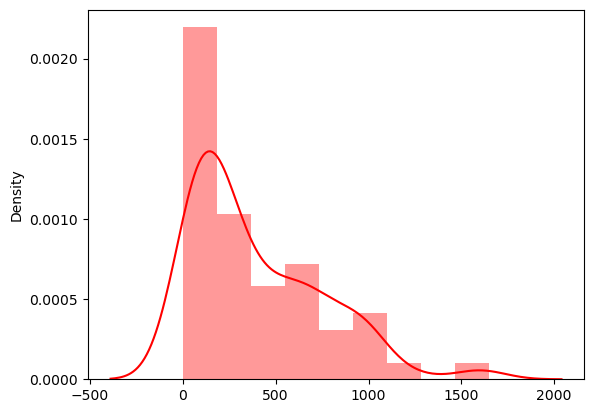

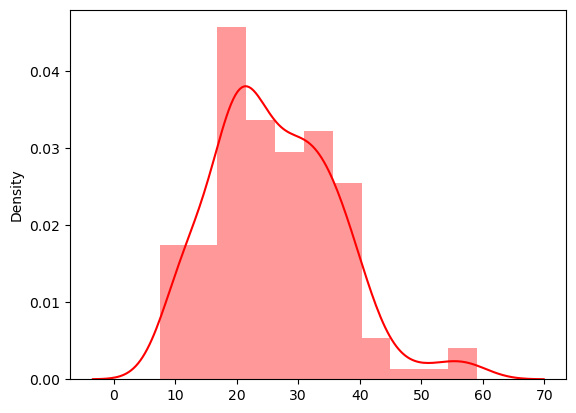

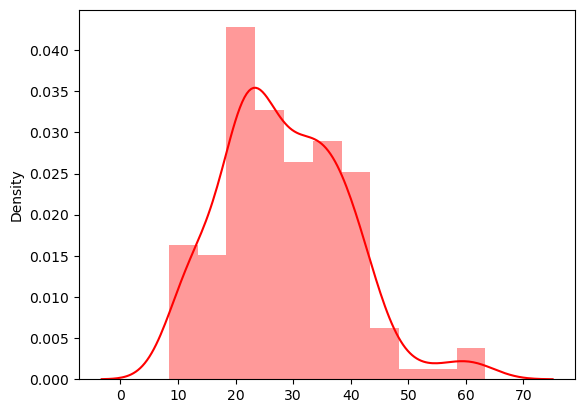

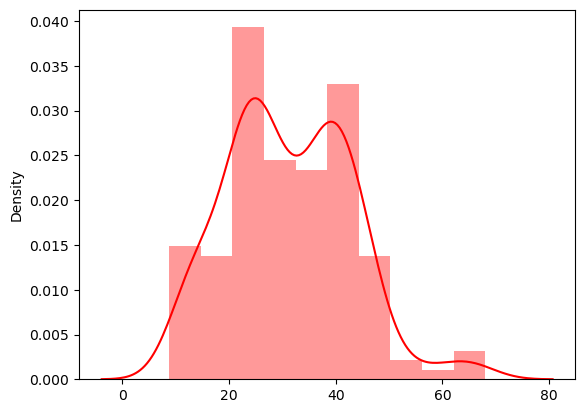

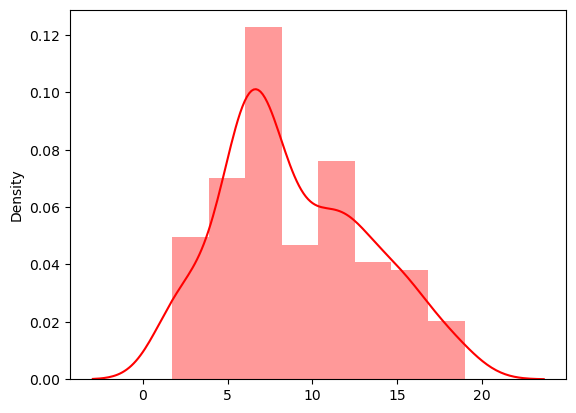

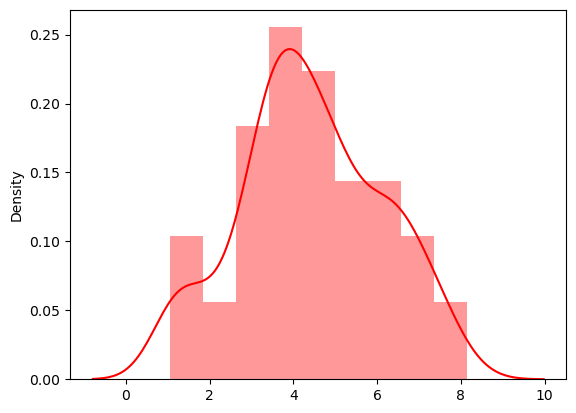

In [14]:
#Figure-level interface for drawing distribution plots onto a FacetGrid
for i in data.columns:
    if data[i].dtypes != "object":
        sns.distplot(x =data[i],color='red' )
        plt.show()

### Strip plot

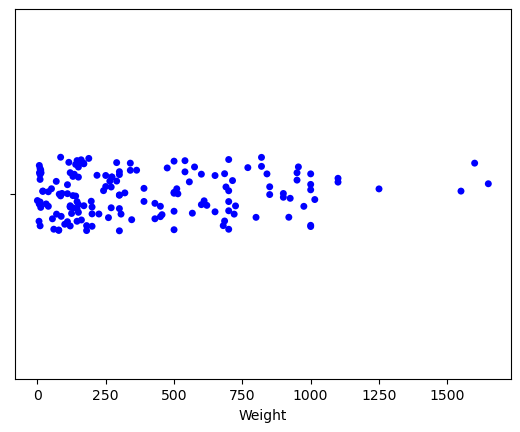

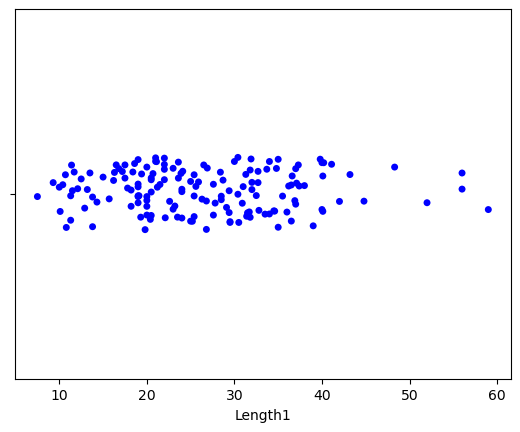

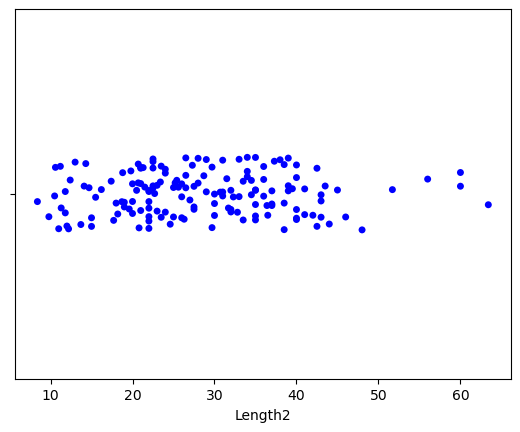

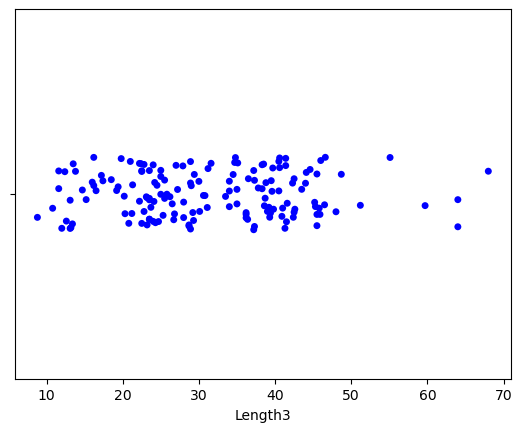

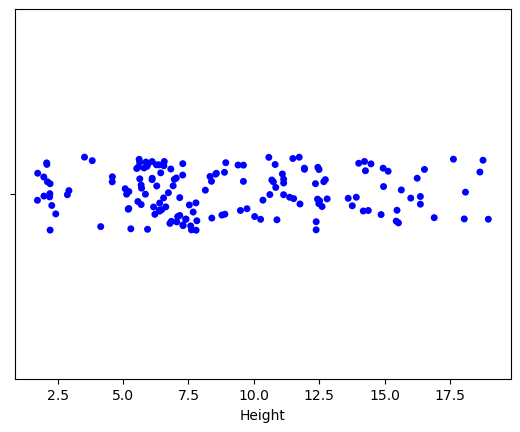

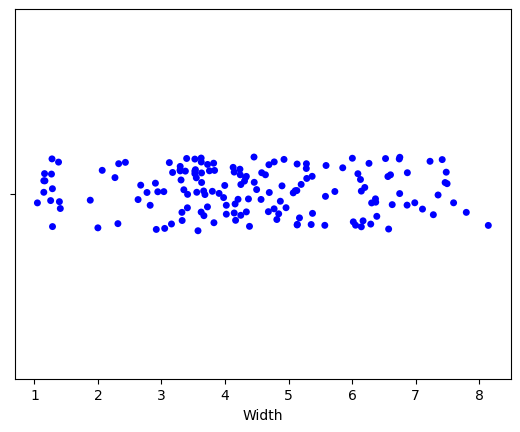

In [15]:
#visualise the distribution of many individual one-dimensional values
for i in data.columns:
    if data[i].dtypes != "object":
        sns.stripplot(x =data[i],color='blue' )
        plt.show()

### Rug plot



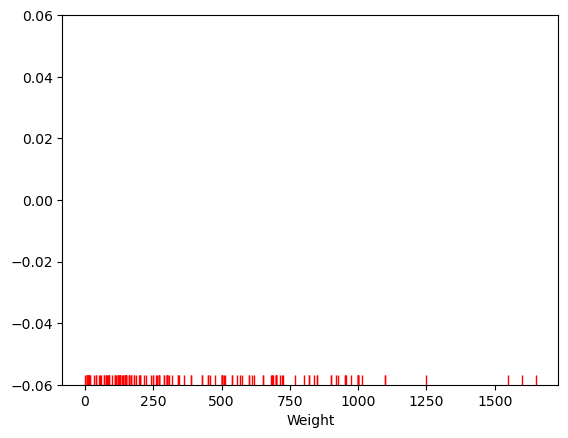

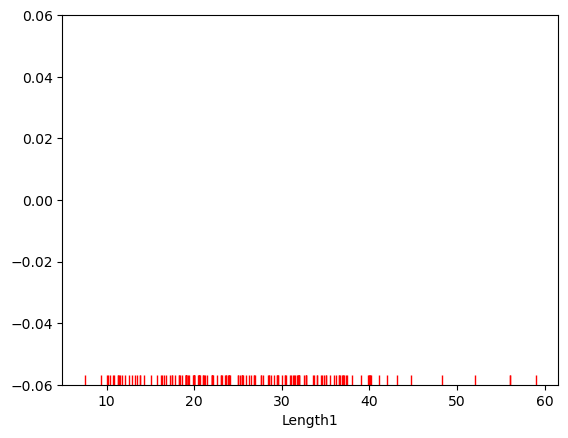

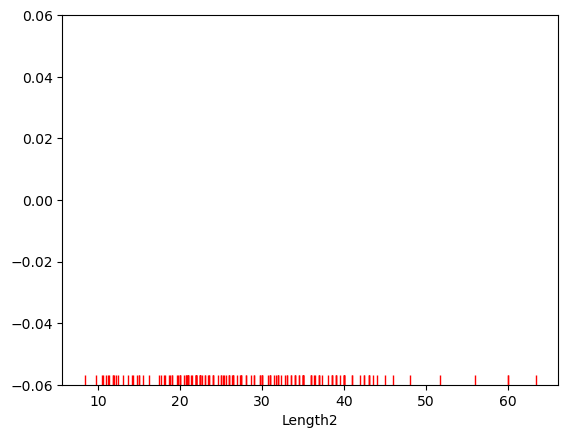

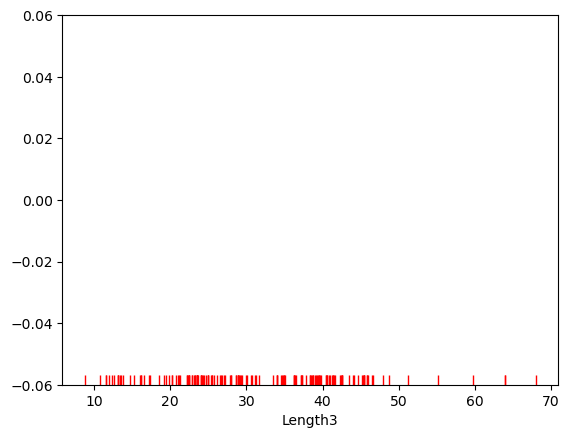

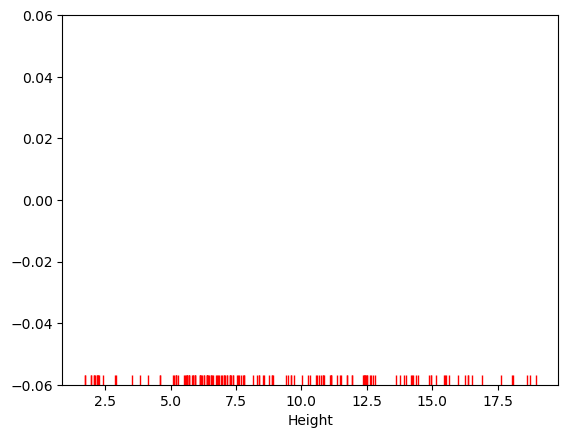

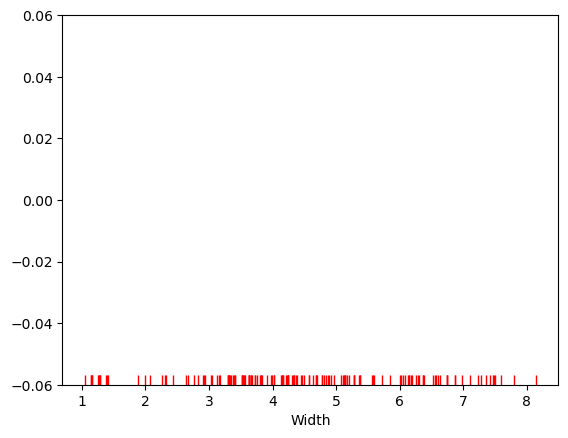

In [16]:
#It is used to visualise the distribution of the data
for i in data.columns:
    if data[i].dtypes != "object":
        sns.rugplot(x =data[i],color='red' )
        plt.show()

### Violin plot

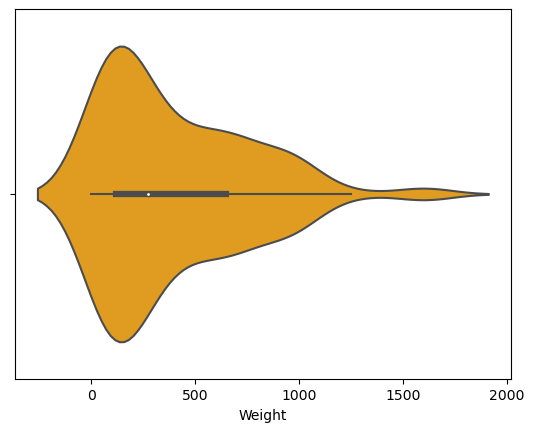

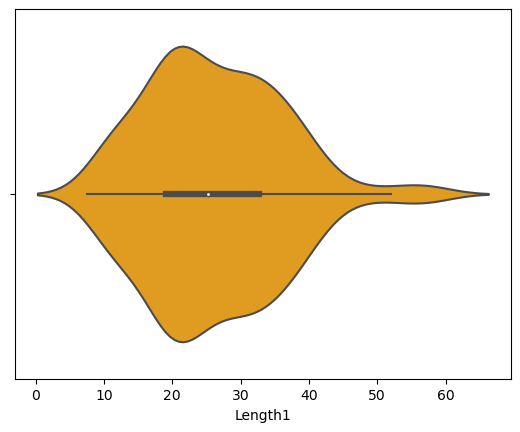

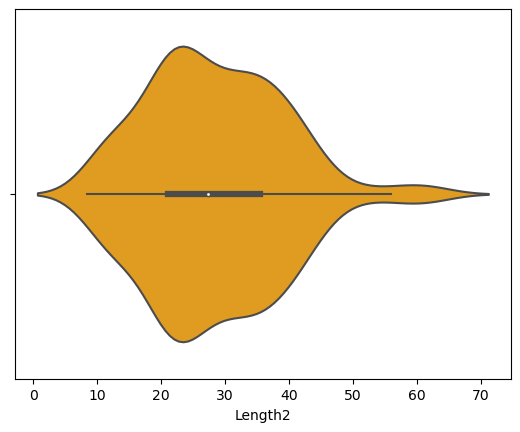

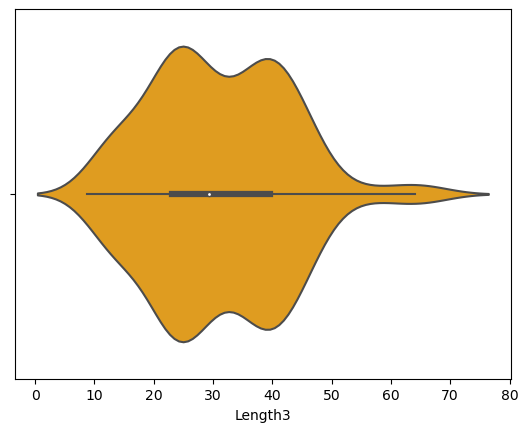

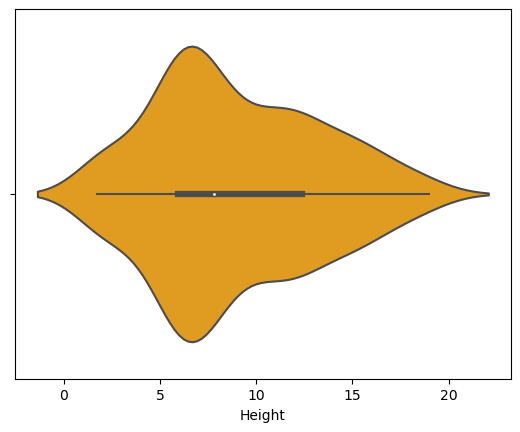

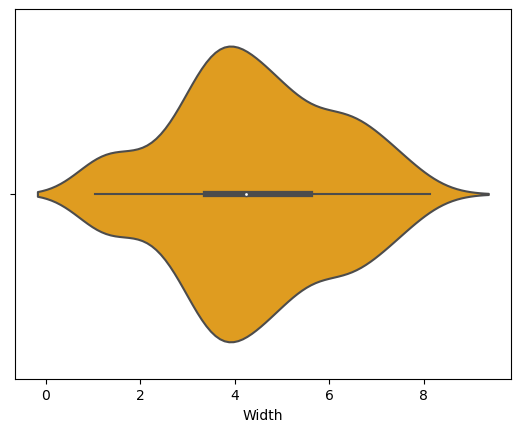

In [17]:
#It is used to visualize the distribution of numerical data
for i in data.columns:
    if data[i].dtypes != "object":
        sns.violinplot(x =data[i],color='orange' )
        plt.show()

### Multivariate analysis

### Bar plot

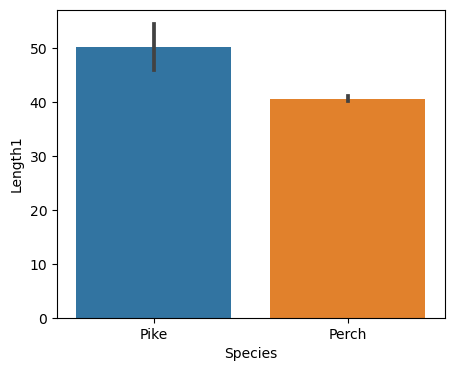

In [18]:
#it is to convey relational information quickly in a visual manner
plt.figure(figsize=(5,4))
sns.barplot(x='Species',y='Length1',data=data.sort_values(by='Length1',ascending=False)[:10]);

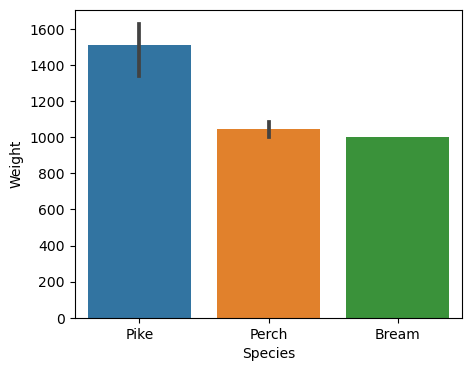

In [19]:
plt.figure(figsize=(5,4))
sns.barplot(x='Species',y='Weight',data=data.sort_values(by='Weight',ascending=False)[:10]);

### Line chart

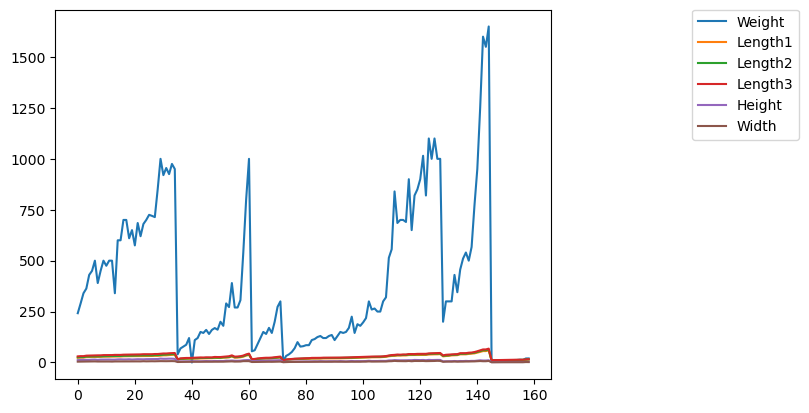

In [20]:
#to connects a series of data points using a line
data.plot.line()
plt.legend(bbox_to_anchor=(1.5,1),loc='upper right',borderaxespad=0)
plt.show()

## Pair plot

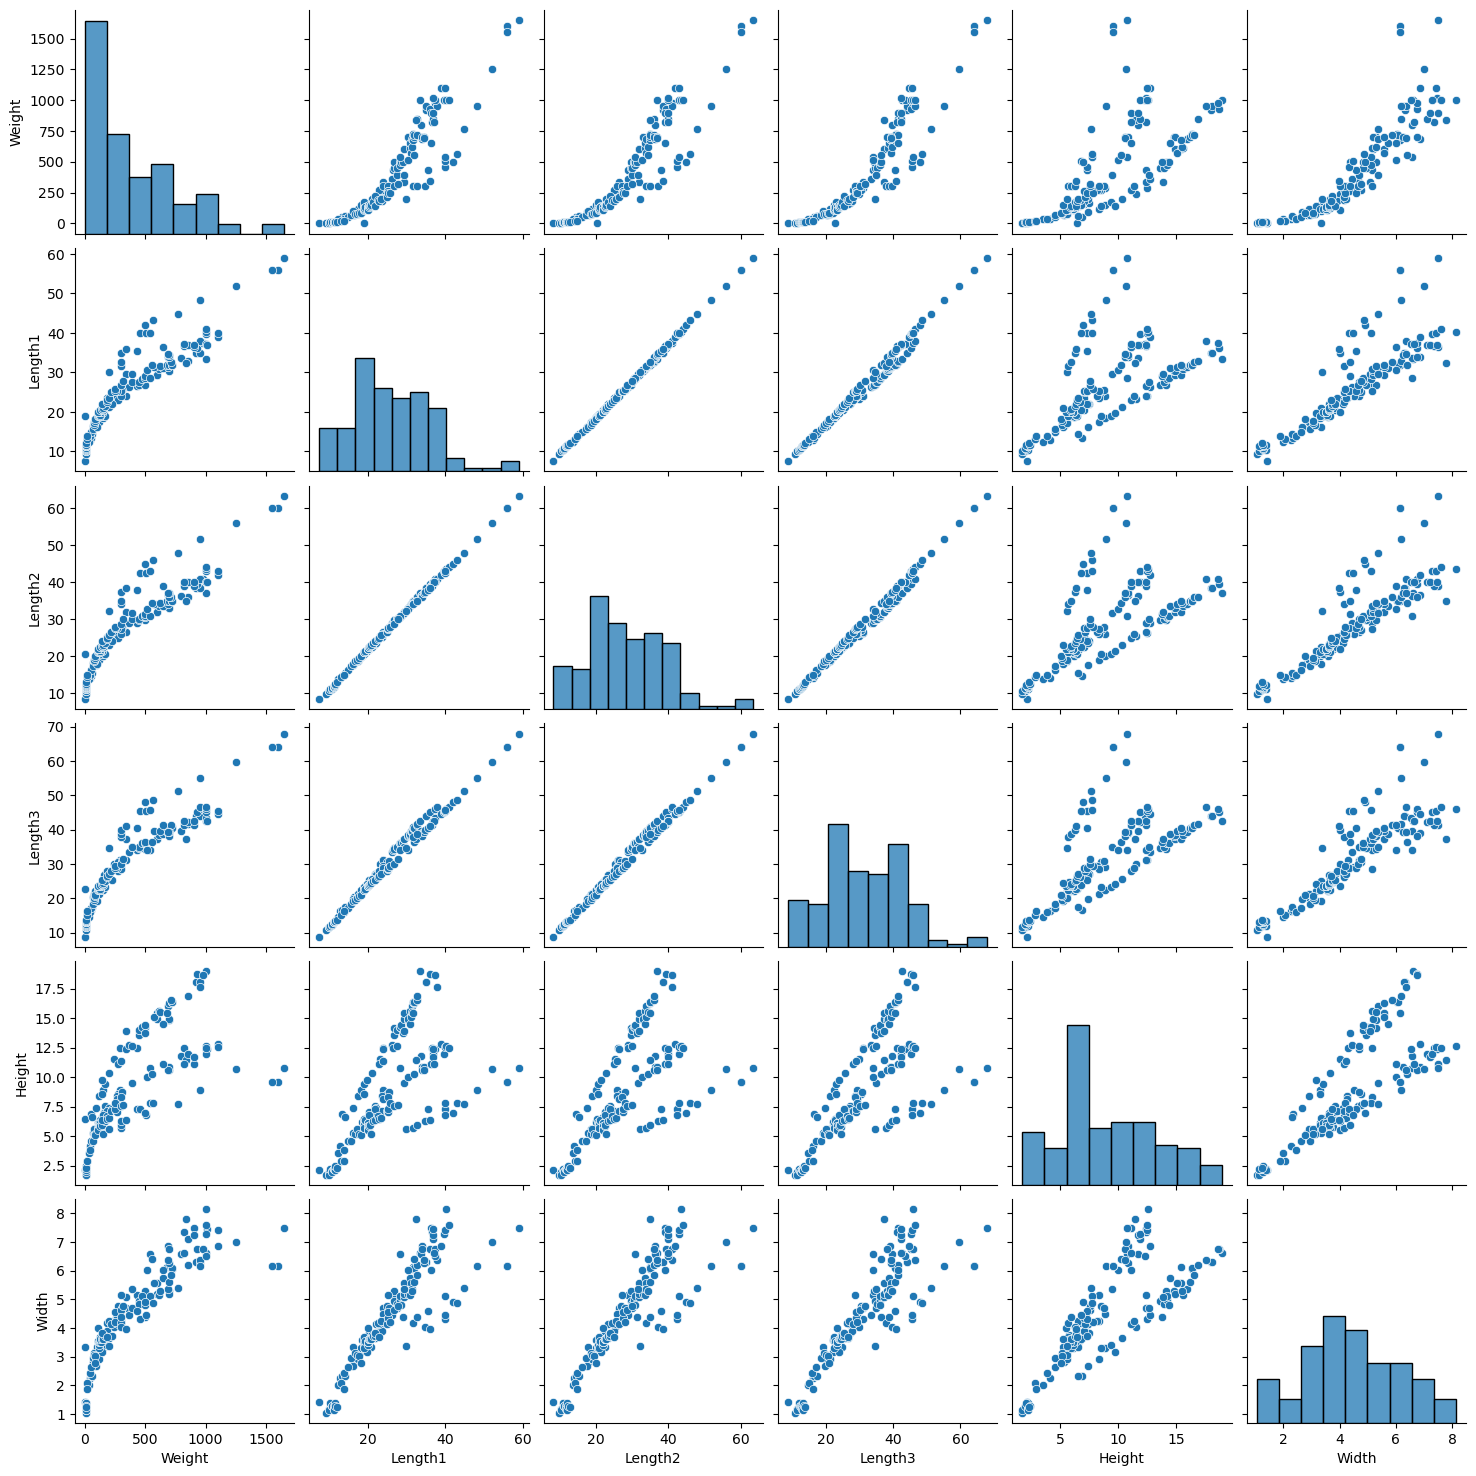

In [21]:
#A pairwise relationships between different  variables in a dataset
sns.pairplot(data);

## Pie chart

In [22]:
#To connects a series of data points using a line
x=data.groupby(['Species'])['Weight'].sum()
x.reset_index()

,Species,Weight
0,Bream,21624.0
1,Parkki,1703.0
2,Perch,21405.4
3,Pike,12218.0
4,Roach,3041.0
5,Smelt,156.5
6,Whitefish,3186.0


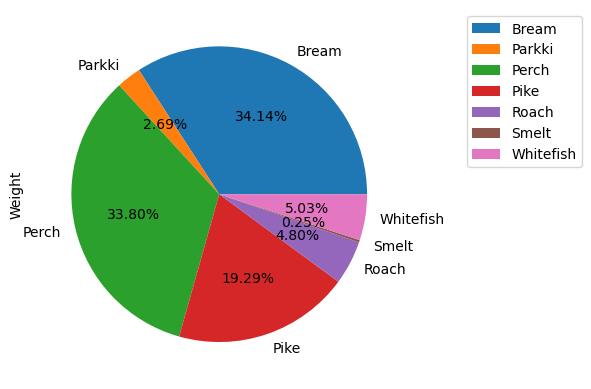

In [23]:
x.plot.pie(autopct='%1.2f%%')
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

### Outlier Treatment (cleaning the outliers)

In [24]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[70,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5%Q1
    return UL,LL

In [25]:
for column in data.columns:
    if data[column].dtype !="object":
        UL,LL=outlier_limit(data[column])
        data[column]=np.where((data[column]>UL) |(data[column]<LL),np.nan,data[column])

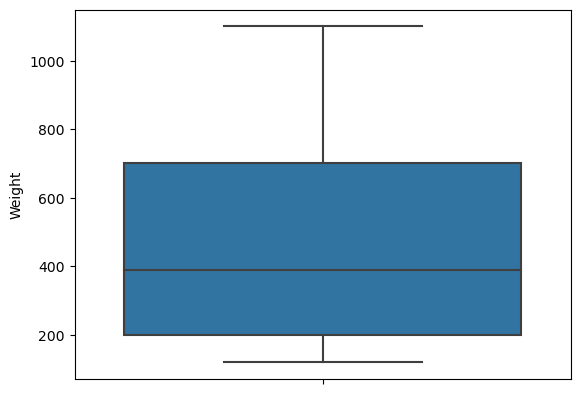

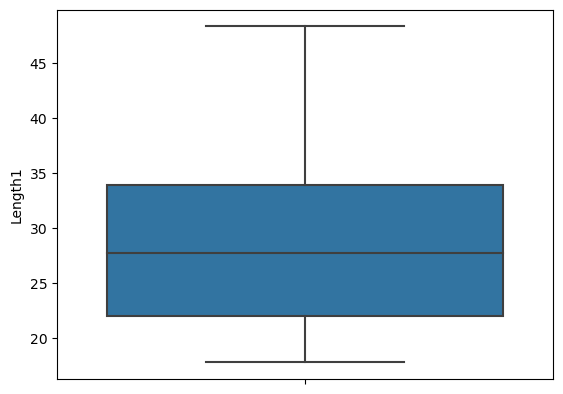

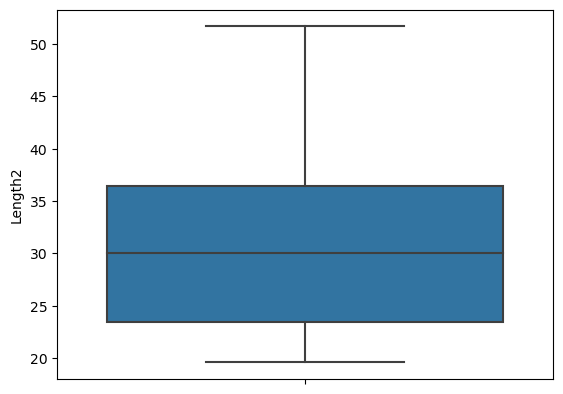

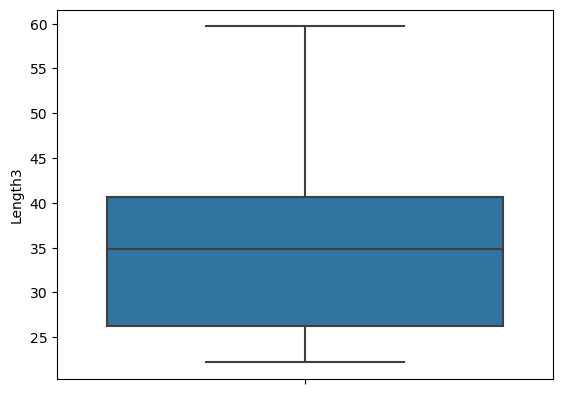

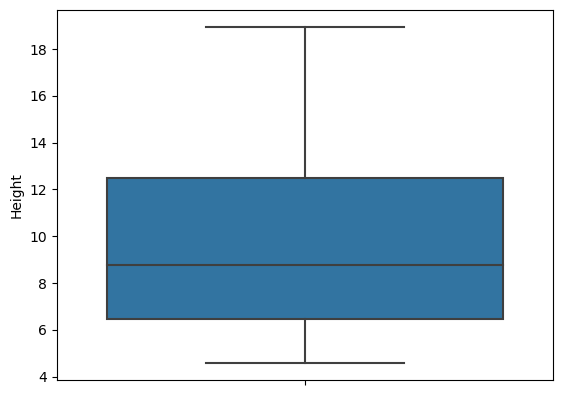

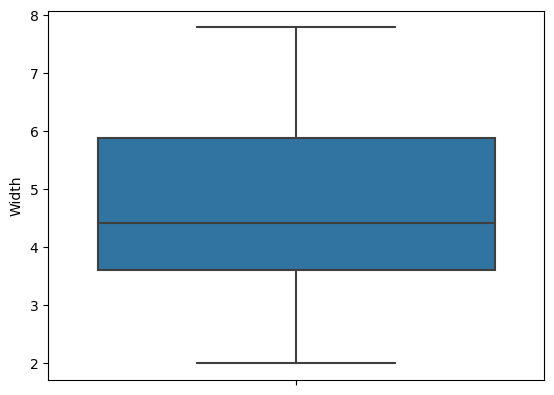

In [26]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.boxplot(y = data[i])
        plt.show();

### We can see that the outlier are treated.

In [27]:
data.dropna(inplace=True)

### Label Encoding

In [28]:
#Encoding the categorical data to numerical
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])

### Heat map

### Checking the correlation with the target 'Weight'

<AxesSubplot:>

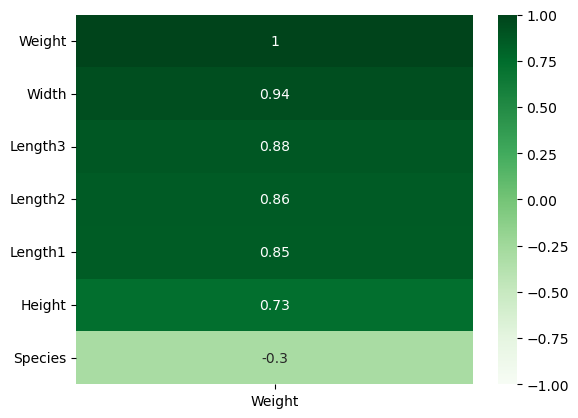

In [29]:
sns.heatmap(data.corr()[['Weight']].sort_values(by='Weight',ascending=False),vmin=-1,vmax=1,annot=True,cmap='Greens')

### Only take the variables which has good correlation with the target variables

<div style="background-color:  yellow ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: bold;"> MODEL SELECTION AND TRAINING
</h1>
    
</div>

### Selecting the x and y

In [30]:
#Drop the target column from the X variable
x=data[['Width','Length3','Length2','Length1','Height']].values
#Create Y variable with target column
y=data[['Weight']].values

### Scaling and fit transform

### At first we will do Feature Scaling to shrink our data values for better result

In [31]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [32]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
136,3,540.0,40.1,43.0,45.8,7.7860,5.1296
137,3,500.0,42.0,45.0,48.0,6.9600,4.8960
138,3,567.0,43.2,46.0,48.7,7.7920,4.8700
139,3,770.0,44.8,48.0,51.2,7.6800,5.3760


<div style="background-color:  yellow ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: bold;"> Cross Validation
</h1>
    
</div>

### MODEL BUILDING

In [33]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DescionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

### Selecting the Best MOdel using Cross Validation

In [34]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average=np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  75.93517948563587
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  75.16850509336358
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  430.06736459655
****************************************************************************************************
cross validation model : DescionTreeRegressor
AVERAGE RMSE:  92.27352553833931
****************************************************************************************************
cross validation model : GradientBoostRegressor
AVERAGE RMSE:  62.556428011858415
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  103.37417127904855
****************************************************

### Training the model
### Model selected is Gradient Boost regressor

In [35]:
model =GradientBoostingRegressor()

In [36]:
#Split the dataset first before ML creating model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model.fit(x_train, y_train)

GradientBoostingRegressor()

### Training & Testing Score

In [37]:
training_score=model.score(x_train, y_train)*100
training_score

99.95000918350793

In [38]:
testing_score=model.score(x_train, y_train)*100
testing_score

99.95000918350793

### Finding R2 Score,MAE & MSE

In [39]:
score=r2_score(y_test,model.predict(x_test))*100
mae=mean_absolute_error(y_test,model.predict(x_test))
mse=mean_squared_error(y_test,model.predict(x_test))
rmse=np.sqrt(mse)
print("r2dcore:",score)
print("training_score:",training_score)
print("testing_score:",testing_score)
print("mae:",mae)
print("mse:",mse)
print("rmse_test:",rmse)

r2dcore: 93.26579870172962
training_score: 99.95000918350793
testing_score: 99.95000918350793
mae: 40.17157184297511
mse: 4570.8137610329395
rmse_test: 67.60779364121373


<div style="background-color:  yellow ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: bold;"> EVALUATION
</h1>
    
</div>

In [40]:
y_pred = model.predict(x)

In [41]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"), dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTION
0,242.0,255.268466
1,290.0,295.098086
2,340.0,303.983357
3,363.0,366.974970
4,430.0,436.446334


<div style="background-color:  yellow ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: bold;"> Visualizing the Prediction

</h1>
    
</div>

### Line plot

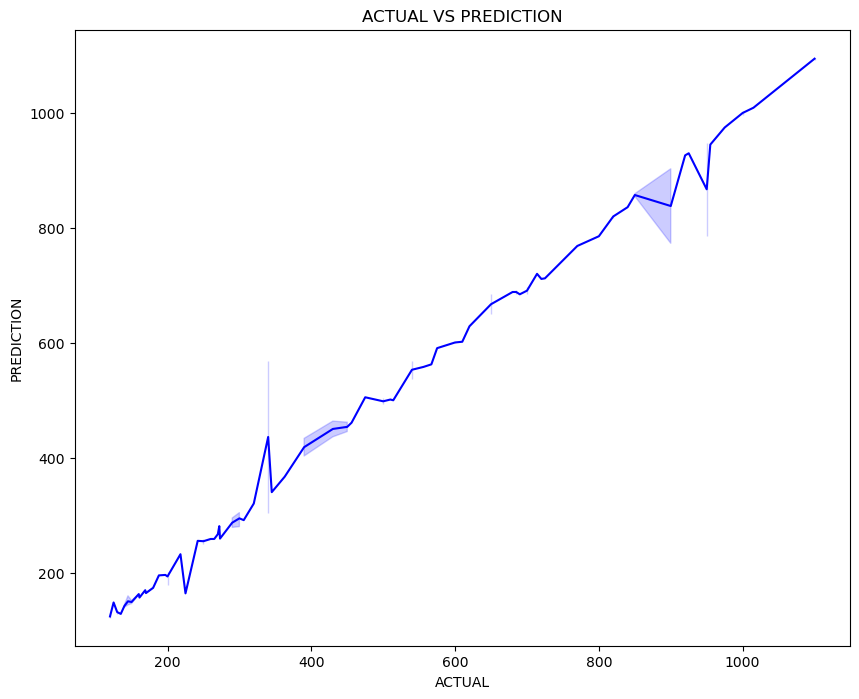

In [42]:
#To connects a series of data points using a line
plt.figure(figsize=(10,8))
plt.title("ACTUAL VS PREDICTION")
sns.lineplot(data=OUTPUT, x="ACTUAL", y="PREDICTION",color='blue');

### Scatter plot

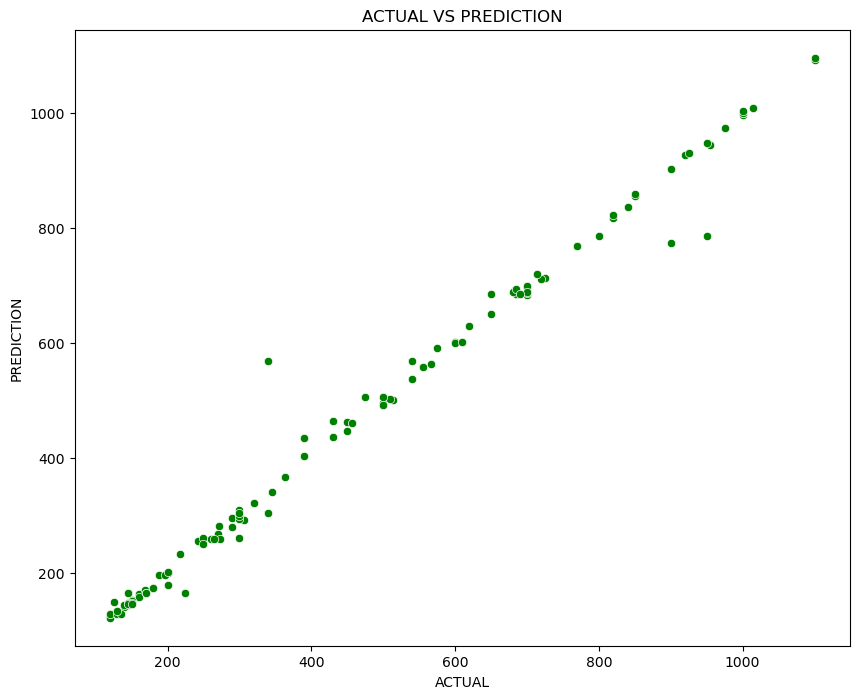

In [43]:
plt.figure(figsize=(10,8))
plt.title("ACTUAL VS PREDICTION")
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTION",color='green');

<div style="background-color:  yellow ; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: bold;"> Conclusion

</h1>
    
</div>

### Based on the regression analysis performed on the fish measurement prediction, the following conclusions can be drawn:

->Relationship between variables: The regression analysis helps identify the relationship between the independent variables (such as length, weight, height, and width) and the dependent variable (fish measurements such as species, weight, or length). It provides insights into how changes in the independent variables impact the fish measurements.

->Statistical significance: The regression analysis provides statistical measures, such as coefficients and p-values, to assess the significance of the independent variables in explaining the variation in fish measurements. A significant p-value indicates that the variable has a meaningful impact on the fish measurements.

->Predictive power: The regression model can be used to predict fish measurements based on the identified relationships. By inputting values for the independent variables, the model can generate predictions for the fish's species, weight, length, or other measurements.

->Model evaluation: Various metrics, such as R-squared (coefficient of determination), adjusted R-squared, and root mean squared error (RMSE), can be used to evaluate the performance of the regression model. A higher R-squared value and a lower RMSE indicate a better fit of the model to the data.

->Assumptions: Regression analysis relies on assumptions, including linearity, independence of errors, homoscedasticity, and normality of residuals. It is important to assess these assumptions to ensure the validity of the regression model and the reliability of its predictions.

->Limitations: Regression analysis has its limitations, such as the assumption of a linear relationship between variables, potential presence of multicollinearity, and the inability to capture all factors that influence fish measurements. Other external factors, such as environmental conditions, food availability, or genetic factors, may also impact fish measurements and should be considered in conjunction with the regression analysis.

It is important to note that the accuracy and reliability of the predictions depend on the quality of the data, the choice of independent variables, and the suitability of the regression model for the specific dataset. Regular model evaluation and updating based on new data are essential for maintaining accurate predictions. Additionally, it may be valuable to explore other modeling techniques, such as decision trees or neural networks, to compare their performance against the regression model.